<a href="https://colab.research.google.com/github/Praxis-QR/fintech/blob/main/QF_4_Simple_Trading_Strategy_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](http://1.bp.blogspot.com/-nqAGzznZQNo/UwS8rxjfXeI/AAAAAAAABTA/nunmRLowpps/s1600/PraxisLogo.gif)<br>
http://www.praxis.ac.in
<hr>

[Prithwis Mukerjee](http://www.yantrajaal.com)<br>

##Simple Trading Strategy <br>
https://www.codementor.io/blog/quantitative-trading-6i4dw8wj4z

##Set up
Reference : <br>
https://www.quandl.com/data/BSE-Bombay-Stock-Exchange/documentation <br>
https://www.quandl.com/tools/python

Get your Quandl Key. [How to get the Quandly API key?](https://data.nasdaq.com/login?intendedUrl=%2Faccount%2Fprofile)

In [ ]:
!pip install quandl

In [ ]:
#students should not execute this cell
#
#Get your Quandl Key. https://data.nasdaq.com/login?intendedUrl=%2Faccount%2Fprofile

from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/'My Drive'/'Praxis'/WebCredentials/QuandlApiRegistrations.txt .
keyFile = open("QuandlApiRegistrations.txt","r")
qKey = keyFile.readline().rstrip()   # last newline removed
keyFile.close()
#print('Quandl Key = ',qKey)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl as q
q.ApiConfig.api_key = qKey       # Students place actual key here

In [ ]:
#Test Quandl Connections py pulling Microsoft Data
#send a get request to query Microsoft's end of day stock prices from 1st Jan, 2010 to 1st Jan, 2019
#msft_data = q.get("EOD/MSFT", start_date="2010-01-01", end_date="2019-01-01")

# look at the first 5 rows of the dataframe
#msft_data.head()

#Get BSE Data <br>
BSE Codes are <br>
Hdfc Bank Ltd EOD Prices|BOM500180 <br>
Hindustan Unilever Ltd. EOD Prices|BOM500696 <br>
Larsen & Toubro Ltd. EOD Prices|BOM500510 <br>
Tata Steel Ltd. EOD Prices|BOM500470 <br>
Axis Bank Ltd. EOD Prices|BOM532215 <br>
Icici Bank Ltd. EOD Prices|BOM532174 <br>
Kotak Mahindra Bank Ltd. EOD Prices|BOM500247 <br>
[Full List of Companies](https://s3.amazonaws.com/quandl-production-static/BSE+Descriptions/stocks.txt)<br>
BSE SENSEX|SENSEX <br> [Full List of Indexes](https://s3.amazonaws.com/quandl-production-static/BSE+Descriptions/indices.txt)


In [ ]:
from datetime import datetime
#startDate = datetime.strptime('2009-01-01','%Y-%m-%d').date()
#endDate = datetime.strptime('2019-09-30','%Y-%m-%d').date()
#print('Start Date :',startDate)
#print('End Date   :', endDate)

#https://www.tutorialspoint.com/How-to-subtract-Python-timedelta-from-date-in-Python
#
from datetime import date, timedelta
interval = 3650  # 10 years
endDate = date.today() - timedelta(days=1)
startDate = date.today() - timedelta(days=interval+1)
print('Start Date :',startDate)
print('End Date   :', endDate)

Start Date : 2012-03-07
End Date   : 2022-03-05


In [ ]:
#symbol = ['BSE/BOM500470','BSE/BOM570001','BSE/BOM500400'] 
#symbol = ['BSE/BOM500696']  # Hindustan Unilever
symbol = 'BSE/BOM500696'  # Hindustan Unilever

In [ ]:
dfData = q.get(symbol,start_date=startDate, end_date=endDate)
dfData.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2012-03-07,381.00,385.5,378.80,384.30,383.522122,91607.0,3372.0,35133311.0,32090.0,35.03,6.70,3.30
2012-03-09,383.25,387.8,381.05,382.05,382.862286,50104.0,1119.0,19182932.0,14526.0,28.99,6.75,-1.20
2012-03-12,384.90,384.9,379.55,380.55,381.602371,119692.0,1674.0,45674751.0,56541.0,47.24,5.35,-4.35
2012-03-13,382.00,385.8,380.60,381.75,382.869181,110710.0,1620.0,42387447.0,43621.0,39.40,5.20,-0.25
2012-03-14,384.00,386.0,380.60,381.30,383.225485,138386.0,1483.0,53033042.0,92575.0,66.90,5.40,-2.70


In [ ]:
dfData.tail(2)

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2022-03-03,2164.0,2164.0,2086.9,2091.65,2114.81,77100.0,7556.0,163051885.0,32832.0,42.58,77.1,-72.35
2022-03-04,2082.0,2082.0,1975.2,2019.90,2010.24,374207.0,52035.0,752246430.0,184803.0,49.39,106.8,-62.10


#Exploratory Data Analysis

In [ ]:
dfData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2475 entries, 2012-03-07 to 2022-03-04
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       2475 non-null   float64
 1   High                       2475 non-null   float64
 2   Low                        2475 non-null   float64
 3   Close                      2475 non-null   float64
 4   WAP                        2475 non-null   float64
 5   No. of Shares              2475 non-null   float64
 6   No. of Trades              2475 non-null   float64
 7   Total Turnover             2475 non-null   float64
 8   Deliverable Quantity       2474 non-null   float64
 9   % Deli. Qty to Traded Qty  2474 non-null   float64
 10  Spread H-L                 2475 non-null   float64
 11  Spread C-O                 2475 non-null   float64
dtypes: float64(12)
memory usage: 251.4 KB


In [ ]:
#Not very useful
#dfData.describe()

In [ ]:
#Monthly Mean Data
#dfData.resample('M').mean()

#Closing Price Data Only

In [ ]:
# assign `Close` to `daily_close`
dfDailyClose = dfData[['Close']]

# returns as fractional change
dfDailyReturn = dfDailyClose.pct_change()

# replacing NA values with 0
dfDailyReturn.fillna(0, inplace=True)

dfDailyClose.head()

,Close
Date,
2012-03-07,384.30
2012-03-09,382.05
2012-03-12,380.55
2012-03-13,381.75
2012-03-14,381.30


In [ ]:
#not really required, but just a demonstration 
#
dfMonthlyClose = dfDailyClose.resample('M').apply(lambda x: x[-1])  # -1 to pick up data from date one day before new month begins
dfMonthlyClose.head(10)

,Close
Date,
2012-03-31,409.90
2012-04-30,416.35
2012-05-31,426.70
2012-06-30,454.35
2012-07-31,466.95
2012-08-31,518.25
2012-09-30,544.55
2012-10-31,547.45
2012-11-30,538.35


#Moving Average

In [ ]:
# assign `Close` to `daily_close`
dfDailyClose = dfData[['Close']].copy()
dfDailyClose.head()

,Close
Date,
2012-03-07,384.30
2012-03-09,382.05
2012-03-12,380.55
2012-03-13,381.75
2012-03-14,381.30


In [ ]:
# calculate the moving average
#dfMAV5 = dfDailyClose.rolling(window=5, min_periods=1).mean()
#dfMAV5 = dfDailyClose.rolling(window=5, min_periods=1).mean()
#dfMAV5.head(10)

dfDailyClose['MAV5'] = dfDailyClose['Close'].rolling(window=5, min_periods=1).mean()
#dfDailyClose['MAV5'] = dfDailyClose['Close'].rolling(window=5).mean()
dfDailyClose.head(10)

,Close,MAV5
Date,,
2012-03-07,384.30,384.3000
2012-03-09,382.05,383.1750
2012-03-12,380.55,382.3000
2012-03-13,381.75,382.1625
2012-03-14,381.30,381.9900
2012-03-15,388.15,382.7600
2012-03-16,390.45,384.4400
2012-03-19,393.25,386.9800
2012-03-20,394.60,389.5500


In [ ]:
dfDailyClose['MAV50'] = dfDailyClose['Close'].rolling(window=50, min_periods=1).mean()
dfDailyClose.head()

,Close,MAV5,MAV50
Date,,,
2012-03-07,384.30,384.3000,384.3000
2012-03-09,382.05,383.1750,383.1750
2012-03-12,380.55,382.3000,382.3000
2012-03-13,381.75,382.1625,382.1625
2012-03-14,381.30,381.9900,381.9900


In [ ]:
# why do we need this step?

#dfDailyClose.reset_index(level=0, inplace=True)
#dfDailyClose.head(3)

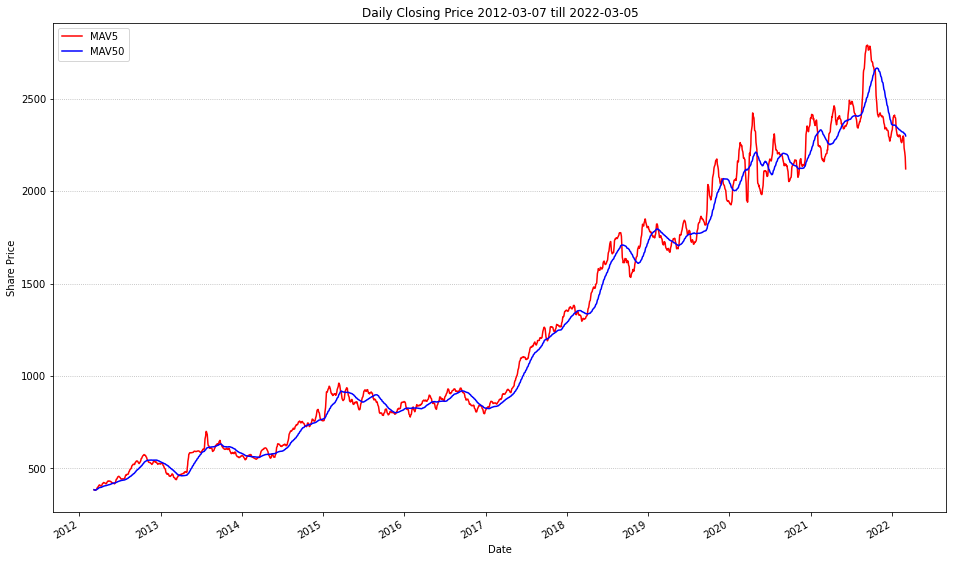

In [ ]:
# Plotting directly from DataFrames with Pandas
dfDailyClose.plot(
    #x='Date', 
    y=['MAV5','MAV50'],
    kind='line', 
    legend=False, 
    color=['red','blue'],
    figsize=(16,10)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Daily Closing Price "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

In [ ]:
# why do we need this step?

#dfMAV.reset_index(level=0, inplace=True)
#dfMAV.head(3)

#Trading Strategy <br>
Buy when short MAV goes above long MAV <br>
Sell when short MAV goes below long MAV

In [ ]:
from datetime import datetime
#startDate = datetime.strptime('2009-01-01','%Y-%m-%d').date()
#endDate = datetime.strptime('2019-06-30','%Y-%m-%d').date()
#print('Start Date :',startDate)
#print('End Date   :', endDate)

#https://www.tutorialspoint.com/How-to-subtract-Python-timedelta-from-date-in-Python
#
from datetime import date, timedelta
interval = 3650  # 10 years
endDate = date.today() - timedelta(days=1)
startDate = date.today() - timedelta(days=interval+1)
print('Start Date :',startDate)
print('End Date   :', endDate)

Start Date : 2012-03-07
End Date   : 2022-03-05


In [ ]:
symbol = 'BSE/BOM500696'  # Hindustan Unilever
dfData = q.get(symbol,start_date=startDate, end_date=endDate)
dfData.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2012-03-07,381.00,385.5,378.80,384.30,383.522122,91607.0,3372.0,35133311.0,32090.0,35.03,6.70,3.30
2012-03-09,383.25,387.8,381.05,382.05,382.862286,50104.0,1119.0,19182932.0,14526.0,28.99,6.75,-1.20
2012-03-12,384.90,384.9,379.55,380.55,381.602371,119692.0,1674.0,45674751.0,56541.0,47.24,5.35,-4.35
2012-03-13,382.00,385.8,380.60,381.75,382.869181,110710.0,1620.0,42387447.0,43621.0,39.40,5.20,-0.25
2012-03-14,384.00,386.0,380.60,381.30,383.225485,138386.0,1483.0,53033042.0,92575.0,66.90,5.40,-2.70


In [ ]:
dfData.tail(2)

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2022-03-03,2164.0,2164.0,2086.9,2091.65,2114.81,77100.0,7556.0,163051885.0,32832.0,42.58,77.1,-72.35
2022-03-04,2082.0,2082.0,1975.2,2019.90,2010.24,374207.0,52035.0,752246430.0,184803.0,49.39,106.8,-62.10


In [ ]:
# step1: initialize the short and long lookback periods
short_lb = 50
long_lb = 120

In [ ]:
#dfData.head()

In [ ]:
# step2a: initialize a new DataFrame called dfSignals
#dfSignals = pd.DataFrame(index=dfData.index)
dfSignals = dfData[['Close']].copy()
dfSignals['signal'] = 0.0
dfSignals.head()

,Close,signal
Date,,
2012-03-07,384.30,0.0
2012-03-09,382.05,0.0
2012-03-12,380.55,0.0
2012-03-13,381.75,0.0
2012-03-14,381.30,0.0


In [ ]:
# step3: create a short simple moving average over the short lookback period
dfSignals['short_mav'] = dfSignals['Close'].rolling(window=short_lb, min_periods=1, center=False).mean()
#dfSignals['short_mav'] = dfSignals['Close'].rolling(window=short_lb, center=False).mean()

In [ ]:
dfSignals.head()

,Close,signal,short_mav
Date,,,
2012-03-05,381.55,0.0,381.550000
2012-03-06,380.85,0.0,381.200000
2012-03-07,384.30,0.0,382.233333
2012-03-09,382.05,0.0,382.187500
2012-03-12,380.55,0.0,381.860000


In [ ]:
# step4: create long simple moving average over the long lookback period
dfSignals['long_mav'] = dfSignals['Close'].rolling(window=long_lb, min_periods=1, center=False).mean()
dfSignals.head()

,Close,signal,short_mav,long_mav
Date,,,,
2012-03-07,384.30,0.0,384.3000,384.3000
2012-03-09,382.05,0.0,383.1750,383.1750
2012-03-12,380.55,0.0,382.3000,382.3000
2012-03-13,381.75,0.0,382.1625,382.1625
2012-03-14,381.30,0.0,381.9900,381.9900


In [ ]:
# step5: generate the signals based on the conditional statement
#dfSignals['signal'][short_lb:] = np.where(dfSignals['short_mav'][short_lb:] > dfSignals['long_mav'][short_lb:], 1.0, 0.0)  
#dfSignals.head(200)

In [ ]:
# step5A: generate the signals based on the conditional statement
dfSignals['signal'] = np.where(dfSignals['short_mav'] > dfSignals['long_mav'], 1.0, 0.0)  
dfSignals.head(200)

#when short_mav > long_mav, signal = 1, else signal = 0

,Close,signal,short_mav,long_mav
Date,,,,
2012-03-07,384.30,0.0,384.3000,384.300000
2012-03-09,382.05,0.0,383.1750,383.175000
2012-03-12,380.55,0.0,382.3000,382.300000
2012-03-13,381.75,0.0,382.1625,382.162500
2012-03-14,381.30,0.0,381.9900,381.990000
...,...,...,...,...
2012-12-18,524.55,1.0,543.0650,513.491667
2012-12-19,522.90,1.0,542.2330,514.090417
2012-12-20,529.45,1.0,541.6240,514.730000


In [ ]:
# step6: create the trading orders based on the positions column
dfSignals['positions'] = dfSignals['signal'].diff()

#when short_mav > long_mav, signal = 1, else signal = 0

#when short_mav MOVES above long_mav, signal changes from 0 to 1
#when signal changes from 0 to 1, the diff is +1 hence BUY

#when short_mav MOVES below long_mav, signal changes from 1 to 0
#when signal changes from 1 to 0, the diff is -1 hence SELL

In [ ]:
#dfSignals.describe
#dfSignals.head(50)

In [ ]:
#SELL Signals
dfSignals[dfSignals['positions'] == -1.0]

,Close,signal,short_mav,long_mav,positions
Date,,,,,
2013-01-17,500.55,0.0,525.988,526.306250,-1.0
2013-11-20,581.70,0.0,611.506,611.956250,-1.0
2015-06-05,829.85,0.0,874.659,875.184167,-1.0
2015-09-18,798.35,0.0,872.944,874.160417,-1.0
2016-11-03,839.75,0.0,885.851,887.026250,-1.0
2018-10-31,1617.85,0.0,1633.482,1635.977917,-1.0
2019-04-10,1691.75,0.0,1733.037,1733.253333,-1.0
2020-06-26,2154.45,0.0,2119.679,2122.206667,-1.0
2020-10-23,2144.05,0.0,2136.728,2138.390000,-1.0


In [ ]:
#BUY Signals
dfSignals[dfSignals['positions'] == 1.0]

,Close,signal,short_mav,long_mav,positions
Date,,,,,
2012-05-21,426.75,1.0,413.867,413.287255,1.0
2013-05-17,585.85,1.0,497.920,497.739167,1.0
2014-04-16,607.55,1.0,574.039,573.714167,1.0
2015-08-14,872.30,1.0,891.155,890.193750,1.0
2016-01-29,816.90,1.0,824.723,824.314583,1.0
2017-03-07,872.60,1.0,847.578,847.086250,1.0
2018-12-20,1833.90,1.0,1686.842,1683.320833,1.0
2019-06-20,1805.50,1.0,1752.256,1751.572500,1.0
2020-08-04,2197.85,1.0,2164.994,2164.035417,1.0


In [ ]:
# why do we need this step?

dfSignals.reset_index(level=0, inplace=True)
#dfSignal.head(150)

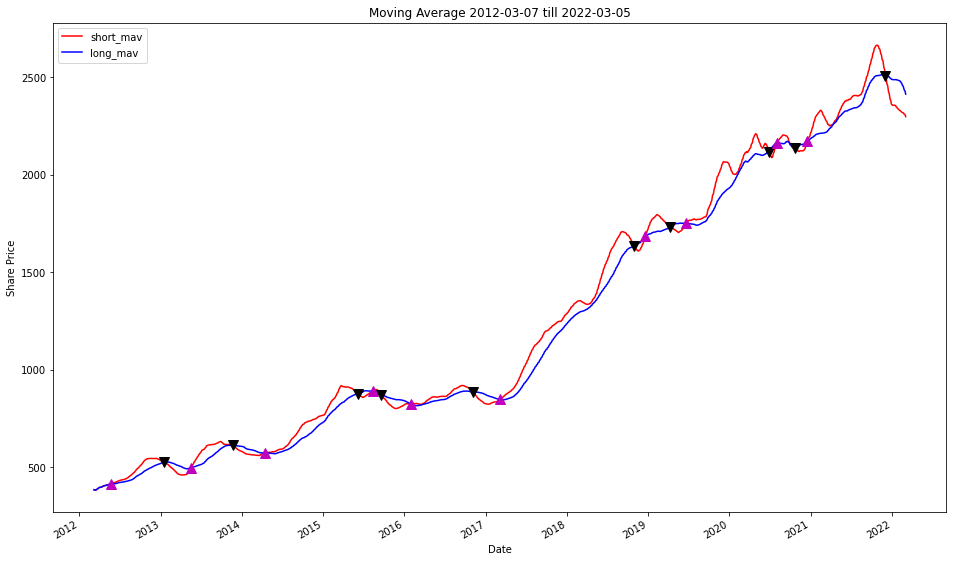

In [ ]:
# Plotting directly from DataFrames with Pandas
dfSignals.plot(
    x='Date', 
    y=['short_mav','long_mav'],
    kind='line', 
    legend=False, 
    color=['red','blue'],
    figsize=(16,10)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Moving Average "+str(startDate)+" till "+str(endDate))
plt.legend()
# plotting the sell signals
plt.plot(dfSignals.loc[dfSignals.positions == -1.0].Date, 
         dfSignals.short_mav[dfSignals.positions == -1.0],
         'v', markersize=10, color='k')

# plotting the buy signals
plt.plot(dfSignals.loc[dfSignals.positions == 1.0].Date, 
         dfSignals.short_mav[dfSignals.positions == 1.0],
         '^', markersize=10, color='m')


#Backtest of Strategy

In [ ]:
#Trade Signals
dfTrade = dfSignals[((dfSignals['positions'] == 1.0) | (dfSignals['positions'] == -1.0))].copy()
dfTrade

,Date,Close,signal,short_mav,long_mav,positions
50,2012-05-21,426.75,1.0,413.867,413.287255,1.0
216,2013-01-17,500.55,0.0,525.988,526.306250,-1.0
298,2013-05-17,585.85,1.0,497.920,497.739167,1.0
425,2013-11-20,581.70,0.0,611.506,611.956250,-1.0
526,2014-04-16,607.55,1.0,574.039,573.714167,1.0
803,2015-06-05,829.85,0.0,874.659,875.184167,-1.0
853,2015-08-14,872.30,1.0,891.155,890.193750,1.0
877,2015-09-18,798.35,0.0,872.944,874.160417,-1.0
965,2016-01-29,816.90,1.0,824.723,824.314583,1.0
1152,2016-11-03,839.75,0.0,885.851,887.026250,-1.0


In [ ]:
#position +1 = BUY, money is flowing out from investor
#position -1 = SELL, money is flowing in to investor
dfTrade['FundFlow'] = -1.0*dfTrade['Close']*dfTrade['positions']
dfTrade

,Date,Close,signal,short_mav,long_mav,positions,FundFlow
50,2012-05-21,426.75,1.0,413.867,413.287255,1.0,-426.75
216,2013-01-17,500.55,0.0,525.988,526.306250,-1.0,500.55
298,2013-05-17,585.85,1.0,497.920,497.739167,1.0,-585.85
425,2013-11-20,581.70,0.0,611.506,611.956250,-1.0,581.70
526,2014-04-16,607.55,1.0,574.039,573.714167,1.0,-607.55
803,2015-06-05,829.85,0.0,874.659,875.184167,-1.0,829.85
853,2015-08-14,872.30,1.0,891.155,890.193750,1.0,-872.30
877,2015-09-18,798.35,0.0,872.944,874.160417,-1.0,798.35
965,2016-01-29,816.90,1.0,824.723,824.314583,1.0,-816.90
1152,2016-11-03,839.75,0.0,885.851,887.026250,-1.0,839.75


In [ ]:
dfTrade['FundFlow'].count()

20

In [ ]:
dfTrade['FundFlow'][:20].sum()
#dfTrade['FundFlow'].sum()

1166.75

In [ ]:
dfTrade['FundFlow'][:20].sum()
#dfTrade['FundFlow'].sum()

1166.75

#Chronobooks <br>
![alt text](https://1.bp.blogspot.com/-lTiYBkU2qbU/X1er__fvnkI/AAAAAAAAjtE/GhDR3OEGJr4NG43fZPodrQD5kbxtnKebgCLcBGAsYHQ/s600/Footer2020-600x200.png)<hr>
Chronotantra and Chronoyantra are two science fiction novels that explore the collapse of human civilisation on Earth and then its rebirth and reincarnation both on Earth as well as on the distant worlds of Mars, Titan and Enceladus. But is it the human civilisation that is being reborn? Or is it some other sentience that is revealing itself. 
If you have an interest in AI and found this material useful, you may consider buying these novels, in paperback or kindle, from [http://bit.ly/chronobooks](http://bit.ly/chronobooks)